## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  

For this project, I will be working to understand the results of an A/B test run by an e-commerce website.  My goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [358]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  

a. Read in the dataset and take a look at the top few rows here:

In [300]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [301]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [302]:
all_users = df['user_id'].nunique()
print(all_users)

290584


d. The proportion of users converted.

In [303]:
converted_users = df.converted.sum()
print(converted_users)

35237


In [304]:
proportion_converted = converted_users/all_users
print(proportion_converted) 

0.121262698566


e. The number of times the `new_page` and `treatment` don't match.

In [305]:
df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")').count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

In [306]:
df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")')['user_id'].count()

3893

f. Do any of the rows have missing values?

In [307]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [308]:
df.isnull().values.any()

False

These results show that there are no missing values. 

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [309]:
df2 = df.drop(df.query('(group != "treatment" and landing_page == "new_page") or (group == "treatment" and landing_page != "new_page") or (group == "control" and landing_page != "old_page") or (group != "control" and landing_page == "old_page")').index)


In [310]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [311]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [312]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [313]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [314]:
df2 = df2.drop(df2[(df2.user_id == 773192) & (df2['timestamp'] == '2017-01-09 05:37:58.781806')].index)


In [315]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [316]:
converted_users_new = df2.query('converted == 1')['user_id'].nunique()
print(converted_users_new)

34753


In [317]:
total_users_new = df2.shape[0]
print(total_users_new)

290584


In [318]:
probability_conv = (converted_users_new/total_users_new)
print(probability_conv)

0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [319]:
converted_users_control = df2.query('converted == 1 and group == "control"')['user_id'].nunique()
print(converted_users_control)
                                    

17489


In [320]:
users_control =df2.query('group == "control"')['user_id'].nunique()
print(users_control)

145274


In [321]:
probability_conv_cont = converted_users_control /users_control
print(probability_conv_cont)

0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [322]:
converted_users_treatment = df2.query('converted == 1 and group == "treatment"')['user_id'].nunique()
print(converted_users_treatment)

17264


In [323]:
users_treatment =df2.query('group == "treatment"')['user_id'].nunique()
print(users_treatment)

145310


In [324]:
probability_conv_treat = converted_users_treatment /users_treatment
print(probability_conv_treat)

0.11880806551510564


d. What is the probability that an individual received the new page?

In [325]:
users_newpage = df2.query('landing_page == "new_page"')['user_id'].nunique()
print(users_newpage)

145310


In [326]:
probability_newpage = users_newpage/total_users_new
print(probability_newpage)

0.5000619442226688


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

Let's look everything we calculated above: 

- Firstly, the probability of an individual converting regardless of the page they receive is 11.96%.

- Secondly, given that an individual was in the control group, the probability they converted is 12.04%.

- Thirdly, given that an individual was in the treatment group, the probability they converted is 11.88%.

From these three figures, we can see that they are very similar: The probablity that users converted in both the control group and the treatment group are pretty similar to each other. They are also very close to the probability of an individual converting regardless of the page they receive. 

**Therefore, this actually looks like there is no evidence that the new page leads to more conversions.**


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Null Hypothesis:           H0:   p_new - p_old <= 0** 

**Alternative Hypothesis:    H1:   p_new - p_old > 0** 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [327]:
p_new = df2.query('converted == 1')['user_id'].nunique()/df2['user_id'].nunique()


In [328]:
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [329]:
p_old = df2.query('converted == 1')['user_id'].nunique()/df2['user_id'].nunique()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [330]:
n_new = df2.query('group == "treatment"')['user_id'].nunique()
n_new 

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [331]:
n_old = df2.query('group == "control"')['user_id'].nunique()
n_old 

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [332]:
new_page_converted = np.random.choice([0,1], size = n_new, p=[1-p_new, p_new])
new_page_converted 

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [333]:
old_page_converted = np.random.choice([0,1],size = n_old, p=[1-p_old, p_old])
old_page_converted

array([0, 0, 0, ..., 1, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [334]:
new_page_converted.mean() - old_page_converted.mean()

-0.00087614476298379651

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [335]:
new_converted_simulation = np.random.binomial(n_new, p_new,  10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old,  10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation
p_diffs

array([-0.00011211, -0.00016747, -0.00084186, ...,  0.00165685,
       -0.00174318, -0.00067666])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

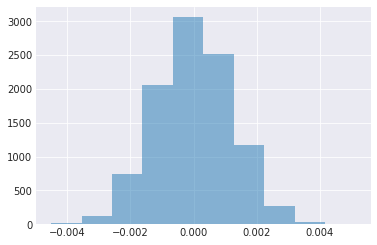

In [336]:
plt.hist(p_diffs, alpha = 0.5),
sns.set_style('darkgrid');


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [337]:
treatment_converted = df2.query('group == "treatment"')['converted'].mean()
control_converted = df2.query('group == "control"')['converted'].mean()

actual_difference = treatment_converted-control_converted
actual_difference


-0.0015782389853555567

In [338]:
p_value = (p_diffs > actual_difference).mean()
p_value

0.90600000000000003

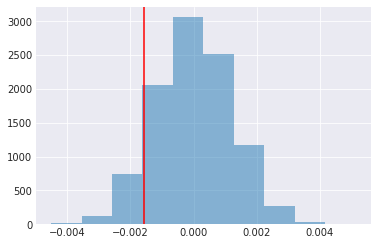

In [339]:
plt.hist(p_diffs, alpha = 0.5),
sns.set_style('darkgrid');
plt.axvline(x=actual_difference, color='red');

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

- We have calculated what proportion of the simulated difference in means is greater than the actually observed difference (the difference between the control group conversion rate and the treatment group conversion rate from the ACTUAL data set). 

- Then we looked at the p - value in order to see the probablity of this difference occurring - to see whether it is significant. 

Calculating the P-Value we must keep in mind: 

- Type I error: Deciding the new page is better (alternative hyp), but really the old page (null hyp) is better (this is the worst error).
- Type II error: Deciding the old page (null hyp) is better, but really the new page (alternative hypothesis) is better.
- We have assumed a Type I error threshold of 0.05

So if the p value <= 0.05 (if it is small) this means a strong evidence against the null (we must reject the null). 
If the p value > 0.05 (if it is large)then we have weak evidence against the null (and we must "fail to reject the null"). 

**We have calculated a p value of 0.9102 which is quite large  (this means that 91.02% of the differences can be attributed to pure chance) - therefore we DO NOT have statistically significant evidence that suggests the new page creates more conversions. Therefore we fail to reject the null hypothesis and keep the old page.**


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [340]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [341]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control' and converted == 1").shape[0]
convert_new = df2.query("group == 'treatment' and converted == 1").shape[0]
n_old = df2.query("group == 'control'").shape[0]
n_new = df2.query("group == 'treatment'").shape[0]

print(convert_old, convert_new, n_old, n_new)


17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [342]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value



(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

- The z score measures the number of standard deviations our data point (in this case the mean of the conversion events) is away from the mean. A z score of 1.31 means that this value lies between the first and second standard deviation (keeping in mind a standard devision of 1 contains around 68% of all elements, and a standard deviation of 2 contains around 95% of all elements). Therefore our z-score lies well within the distribution - and since it does not exceed the critical value at 95% (1.96) we fail to reject the null hypothesis. 

- The p score tells us the likelihood/probability that the difference we see in sample means is due to chance (the smaller the p-value, the more evidence we have against the null hypothesis). A p value of 0.905 > 0.05 (our error threshhold) and therefore we fail to reject the null hypothesis. 

**Therefore, the new page is not better than the old page / the old page is the same or better than the new page. This is the same conclusion as in parts j and k.** 


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression model - this is categorical - it predicts 1 of 2 possible outcomes (convert or not depending on page). 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [343]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [344]:
df2['intercept'] = 1
df2[['drop', 'ab_page']] = pd.get_dummies(df2['group'])
df2.drop('drop', axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [345]:
logit = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit.fit()



Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [346]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Jul 2019   Pseudo R-squ.:               8.077e-06
Time:                        13:32:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

- The p-value from Part III associated with ab_page is 0.19. 
- The p-value from Part II was from 0.9051 - 0.9102. 

**The P Values from Part II differ from the P value found in Part III because the hypothesis thest in Part II is a one-tail test (to prove that the old page was better than the new page - but we didnt look at the possibility that the new page could be much worse than the old page), and Part III is a two-tail regression test - therefore the p values have different meaning.** 


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Other things that might influence whether or not an individual converts:**

- Look at demographic details of the people converting: wehter or not there are patterns in age, location, gender. 

- Look at the time and date and see whether certain conversions happen at specific times. 

- Look at the issue of covariance /collinearity - we want to have our predictor variable (x) to be correlated (have a linear relationship) with our response variable (y) but when we add multiple predictor variables they might end up correlating with each other. This can skew the data, so look at how they are related first (sb.pairplot). 

- Consider the novelty effect: the treatment group might be drawn to change whereas the old group might be unhappy that a change is occurring at all (change averse). 

- Consider non-linear relationships (quadratics, cubics).



g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [347]:
countries = pd.read_csv('countries.csv')

In [348]:
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [349]:
df_new = countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [350]:
countries_dummies = pd.get_dummies(df_new['country'])
df_countries = df_new.join(countries_dummies)
df_countries = df_countries.drop(['country', 'CA'], axis=1)
df_countries.head()


,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [351]:
logit = sm.Logit(df_countries['converted'], df_countries[['intercept', 'US', 'UK']])
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 02 Jul 2019   Pseudo R-squ.:               1.521e-05
Time:                        13:32:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

In [352]:
np.exp(0.0408),np.exp(0.0507) 

(1.0416437559600236, 1.0520072437650141)

**Compared to CA overall conversions:**
- US (if the user is from the US) is 1.04 times more likely to convert, holding all else constant. 
- UK (if the user is from the UK) is 1.05 times more likely to convert, holding all else constant. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [362]:
df_countries['UK_new_page'] = df_countries['UK'] * df_countries['ab_page']
df_countries['US_new_page'] = df_countries['US'] * df_countries['ab_page']
df_countries.head()



,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,UK_ab_page,US_ab_page,UK_new_page,US_new_page
user_id,,,,,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,0,0,0
928468,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1,0,1
822059,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,1,0,1,0
711597,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,0,0,0
710616,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,1,0,1,0


In [363]:
log_mod = sm.Logit(df_countries['converted'], df_countries[['intercept', 'UK_new_page', 'US_new_page']])
results = log_mod.fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 02 Jul 2019   Pseudo R-squ.:               1.082e-05
Time:                        13:49:56   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.3164
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.9926      0.008   -252.910      0.000      -2.008      -1.977
UK_new_page     0.0112      0.018      0.626      0.532      -0.024       0.046
US_new_page    -0.0144      0.012     -1.155      0.248      -0.039       0.010
===============================================================================
"""

In [357]:
1/np.exp(0.0112), np.exp(-0.0144)

(0.98886248649950048, 0.98570318412244295)

For the treatment group  - the individuals who received the new page-  (compared to CA conversions) 
- UK is 0.989 times more likely to convert than Canada (but with p value of 0.53 this is not very statistically significant)
- US is 0.956 times less likely to convert than Canada (but with p value of 0.248 this is not very statistically significant)

**Compared to Canada, US conversions on the new page overall are lower, and UK overall new conversions on the new page are higher. Many reasons for this could exist.** 

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0